

## 项目 : 预测波士顿房价


欢迎来到 DSVC 《机器学习》研讨班第二周的项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [2]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # 检查你的Python版本
# from sys import version_info
# if version_info.major != 2 and version_info.minor != 7:
#     raise Exception('请使用Python 2.7来完成此项目')
    
# 让可视化的结果在notebook中显示
%matplotlib inline

In [3]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 完成
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


__下面三张图的横坐标分别是：住宅平均房间数量、区域中被认为是低收入阶层的比率和镇上学生与教师数量比例，纵坐标是房屋的中值价格__

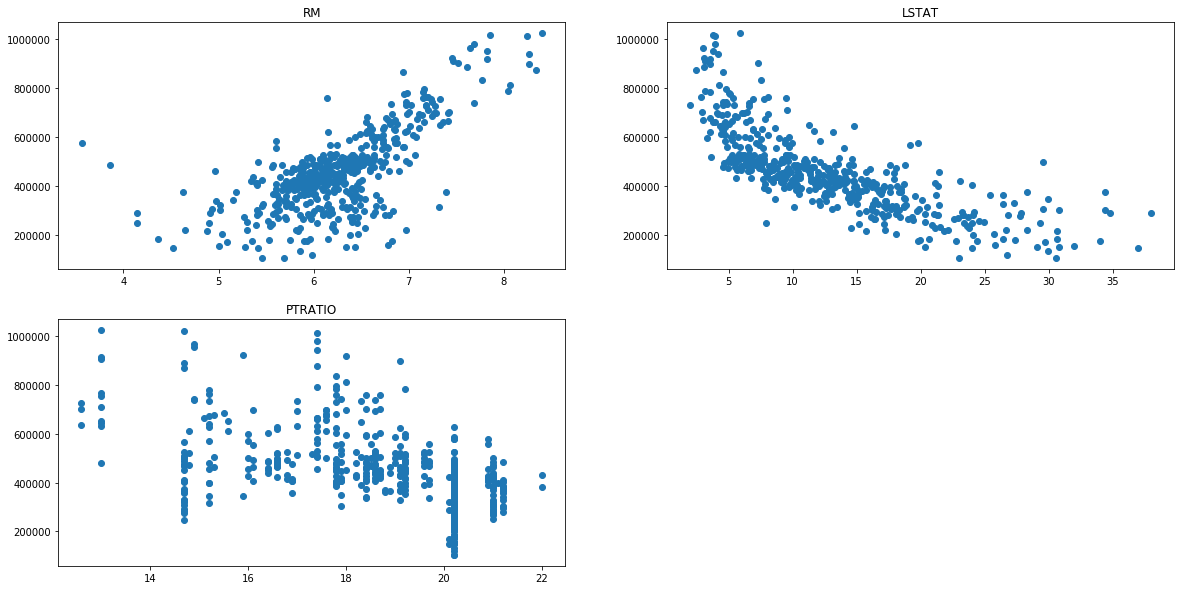

In [4]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title('RM')
plt.scatter(features.get_values()[:, 0], prices.get_values())
plt.subplot(2, 2, 2)
plt.title('LSTAT')
plt.scatter(features.get_values()[:, 1], prices.get_values())
plt.subplot(2, 2, 3)
plt.title('PTRATIO')
plt.scatter(features.get_values()[:, 2], prices.get_values())

---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [5]:
#TODO 1

#目标：计算价值的最小值
minimum_price = np.min(prices)

#目标：计算价值的最大值
maximum_price = np.max(prices)

#目标：计算价值的平均值
mean_price = np.mean(prices)

#目标：计算价值的中值
median_price = np.median(prices)

#目标：计算价值的标准差
std_price = np.std(prices)

#目标：输出计算的结果
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

### 问题 1 - 回答：
* RM特征   
    观察上面第一幅图可以看出样本点拟合的图形是随着RM的增大逐渐上升的，而且常理来说，房屋中的房间数量增加，则房屋总面积就会增加，价格自然然更高      
* LSTAT特征   
    从第二幅图中可以看出样本点拟合的图形是随着横坐标的增大逐渐减小的，LSTAT代表当地低收入人群的比例，如果这个比例增大，则当地人均收入就会很低，房价自然会降低       
* PTRATI0特征   
    从第三幅图中观察，当横坐标很大时，显然房价的取值会降低，横坐标表示当地学生和老师数量的比例，如果学生很多，而老师较少，表明当地教学水平较低，有可能是因为当地经济不发达，房价自然会低
    

### 编程练习 2: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `random_seed` ，这会确保结果的一致性；
  - 提示：打乱训练集和测试集的数据时，只要创建一个 list，然后用这个 list 分别应用于 X，y 生成训练集和测试集。
 ```
 test = np.array([1, 3, 5, 7, 9, 11])
 """ test[[0,1,2]] = [1, 3, 5]
 """ test[[1,3,5]] = [3, 7, 11]
 ```
  
  可能需要用到的函数
  - (numpy.random.seed)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html]
  - (numpy.random.shuffle)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html]

In [52]:
LEN, seed = 489, 666
def generate_train_and_test(X, y):
    """打乱并分割数据为训练集和测试集"""
    np.random.seed(seed)
    shuffle_index = np.random.permutation(LEN)#返回一个乱序列
    test_size = int(LEN * 0.2)
    test_index = shuffle_index[:test_size] #返回测试集的索引序列
    train_index = shuffle_index[test_size:] #返回训练集的索引序列
    X_test = X[test_index]
    y_test = y[test_index]
    X_train = X[train_index]
    y_train = y[train_index]
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = generate_train_and_test(features.values, prices.values)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 3)
(97, 3)
(392,)
(97,)


### 问题 2 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

### 问题 2 - 回答:
我们在学习模型中的参数时，需要有测试数据来衡量模型的准确度，如果我们直接将全部数据集用于训练，我们就没有相对合理的数据去衡量我们的参数是否正确，因为我们很难得到真实环境中较为合理的数据，如果我们将原有数据集分割，就能在模型还没有到实际使用的阶段通过我们分割出来的测试集进行模型的调整。如果我们在相同的数据集上进行模型的测试，很容易出现过拟合的情况，我们要的模型需要有一定的泛化性

---
## 第三步. 模型衡量标准

### 编程练习3：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判，可参考[`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)。
- 将他们的表现评分储存到`score`变量中。


In [39]:
# TODO 3

# 提示： 导入r2_score
    
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    mean = np.mean(y_true)
    temp = np.sum((y_predict - y_true) ** 2) / np.sum((y_true - mean) ** 2)
    score = 1 - temp
    return score

### 问题 3 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [8]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


### 问题 3 - 回答:
成功了，因为决定系数是0.9左右，表明我们从数据中学习到的参数已经能够拟合住90%的情况

## 第四步. 模型训练
### 编程练习 4：训练回归模型
在这个练习中，你将需要将所学到的内容整合，使用 **gradient descent 算法**训练一个线性回归模型。你可以尝试使用自己构建的多项式特征和 L1、L2 Loss，进行实验后，讨论他们是否对你的模型有效，并通过前面定义的 `performance_metric` 量化他们的提升效果。

在这里，你不能使用现成 package，不能使用额外 data。


In [54]:
# TODO 4
# 特征放缩　　　
def featureScale(X):
    resX = np.empty(shape=X.shape, dtype=float)
    mean = np.array([np.min(X[:, i]) for i in range(X.shape[1])])
    scale = np.array([(np.max(X[:, i] - np.min(X[:, i]))) for i in range(X.shape[1])])
    for i in range(X.shape[1]):
        #对样本的每一列特征处理
        resX[:, i] = (X[:, i] - mean[i]) / scale[i]
    return resX

# 定义计算目标函数,这里目标函数是均方误差ＭＳＥ
def J(X, theta, y):
    m = len(y)
#     R2 = lamda * np.sum(np.square(theta))
    temp = np.sum((X.dot(theta) - y) ** 2) 
    return temp / (2 * m)

# 定义计算求目标函数的梯度　　　　
def graJ(X, theta, y):
    gra = np.empty(len(theta)) # 先给导数向量开空间，我们要对每个theta求偏导
    gra[0] = np.sum(X.dot(theta) - y) #计算第一个特征对应的theta求偏导，因为X1 = 1
    for i in range(1, len(theta)):
        gra[i] = (X.dot(theta) - y).dot(X[:, i]) #可以看成是两个向量的点乘，第二个向量对应着全部样本的第ｉ列特征
    
    return gra / len(X)

#　梯度下降实现(学习率默认为0.01,默认最多迭代10000次)
def gradientDescent(X, theta, y, n_iters=10000, alpha=0.01):
    
    for i in range(n_iters):
        gra = graJ(X, theta, y)
        last_theta = theta
        theta = theta - alpha * gra 
        print(J(X, theta, y))
    
    return theta

def train(X, y):
    X_train_plus = np.hstack([np.ones((len(X), 1)), X])
    init_theta = np.zeros(X_train_plus.shape[1]) #初始化theta向量，长度对应样本中的特征数＋１
    theta = gradientDescent(X_train_plus, init_theta, y)#在原来的样本矩阵前加一列特征，特征值都为１,即X1
    return theta

def predict(X_test, theta):
    X_test_plus = np.hstack([np.ones((len(X_test), 1)), X_test])
    return X_test_plus.dot(theta)


#　测试模型
X_train = featureScale(X_train)
print(X_train)
theta = train(X_train, y_train)
print(theta)
X_test = featureScale(X_test)
y_predict = predict(X_test, theta)
print(y_predict.shape)
score = performance_metric(y_test, y_predict)
print(score)

[[0.66163656 0.28571429 0.89361702]
 [0.59128587 0.524      0.80851064]
 [0.541339   0.13114286 0.40425532]
 ...
 [0.59086079 0.45171429 0.80851064]
 [0.38002125 0.50828571 0.80851064]
 [0.43188098 0.30057143 0.69148936]]
112834917750.78983
109323053446.91295
105938143588.71347
102675580711.86528
99530924588.55772
96499896157.30923
93578371673.11101
90762377069.90256
88048082527.67297
85431797236.76003
82909964352.18968
80479156131.15805
78136069247.00818
75877520273.29555
73700441331.76868
71601875898.31474
69578974761.13719
67628992125.6393
65749281860.68886
63937293881.13225
62190570661.61256
60506743876.92563
58883531164.32118
57318733003.32272
55810229708.80087
54355978533.188835
52954010873.87914
51602429581.983345
50299406368.77588
49043179306.276085
47832050418.55189
46664383360.45171
45538601180.591736
44453184165.53997
43406667762.24991
42397640575.90382
41424742440.42825
40486662559.04413
39582137712.30925
38709950531.20364
37868927832.89662
37057939016.92063
36275894519.559

5971330765.620287
5968948036.796174
5966568090.666805
5964190923.974455
5961816533.465206
5959444915.888964
5957076067.999427
5954709986.554106
5952346668.314299
5949986110.045108
5947628308.51541
5945273260.49788
5942920962.768958
5940571412.108871
5938224605.301611
5935880539.134933
5933539210.400363
5931200615.893172
5928864752.4123955
5926531616.760812
5924201205.744942
5921873516.175052
5919548544.865135
5917226288.632922
5914906744.299872
5912589908.691159
5910275778.63568
5907964350.966044
5905655622.51857
5903349590.133281
5901046250.653899
5898745600.927847
5896447637.806232
5894152358.143859
5891859758.799204
5889569836.634435
5887282588.515381
5884998011.311551
5882716101.896118
5880436857.145911
5878160273.941427
5875886349.166806
5873615079.709843
5871346462.461974
5869080494.3182745
5866817172.177463
5864556492.941879
5862298453.517501
5860043050.813923
5857790281.744359
5855540143.225638
5853292632.178203
5851047745.526099
5848805480.196976
5846565833.122078
5844328801.2

4457277134.369117
4456659261.088411
4456042104.831581
4455425664.759828
4454809940.0353365
4454194929.821273
4453580633.281783
4452967049.581992
4452354177.888001
4451742017.366887
4451130567.186707
4450519826.516486
4449909794.526226
4449300470.386901
4448691853.270452
4448083942.349793
4447476736.798807
4446870235.792341
4446264438.506212
4445659344.117199
4445054951.803047
4444451260.742461
4443848270.115113
4443245979.101628
4442644386.883598
4442043492.64357
4441443295.565044
4440843794.832484
4440244989.631306
4439646879.147875
4439049462.569515
4438452739.084498
4437856707.8820505
4437261368.152343
4436666719.086496
4436072759.87658
4435479489.715611
4434886907.797545
4434295013.3172865
4433703805.470682
4433113283.454519
4432523446.466525
4431934293.705368
4431345824.370653
4430758037.662924
4430170932.78366
4429584508.935273
4428998765.321115
4428413701.145463
4427829315.613533
4427245607.931466
4426662577.306336
4426080222.946143
4425498544.059816
4424917539.857211
4424337209

4062897361.249046
4062734322.4988427
4062571469.083416
4062408800.786485
4062246317.392029
4062084018.684273
4061921904.4477005
4061759974.467045
4061598228.5272913
4061436666.4136777
4061275287.9116907
4061114092.8070726
4060953080.885812
4060792251.9341507
4060631605.73858
4060471142.08584
4060310860.7629247
4060150761.5570703
4059990844.2557683
4059831108.6467557
4059671554.51802
4059512181.657796
4059352989.854565
4059193978.897056
4059035148.5742497
4058876498.6753683
4058718028.989884
4058559739.307513
4058401629.4182215
4058243699.1122165
4058085948.1799555
4057928376.4121366
4057770983.5997076
4057613769.533857
4057456734.0060215
4057299876.8078775
4057143197.731349
4056986696.5686016
4056830373.112046
4056674227.154332
4056518258.4883585
4056362466.9072604
4056206852.204419
4056051414.1734543
4055896152.6082315
4055741067.302853
4055586158.0516677
4055431424.649258
4055276866.8904533
4055122484.5703187
4054968277.484163
4054814245.4275303
4054660388.196207
4054506705.5862203
4

3962383606.165729
3962332806.8070145
3962282062.0882287
3962231371.9460464
3962180736.3172145
3962130155.138554
3962079628.346961
3962029155.8794045
3961978737.672927
3961928373.6646447
3961878063.7917485
3961827807.9915023
3961777606.2012405
3961727458.3583746
3961677364.40039
3961627324.26484
3961577337.889357
3961527405.2116413
3961477526.169469
3961427700.700688
3961377928.7432194
3961328210.235058
3961278545.1142664
3961228933.3189855
3961179374.787426
3961129869.4578695
3961080417.268672
3961031018.158261
3960981672.0651364
3960932378.927869
3960883138.6850996
3960833951.2755466
3960784816.6379943
3960735734.711302
3960686705.4343977
3960637728.7462845
3960588804.5860333
3960539932.8927884
3960491113.6057644
3960442346.6642494
3960393632.0075955
3960344969.575236
3960296359.306665
3960247801.1414547
3960199295.0192447
3960150840.879746
3960102438.662738
3960054088.3080745
3960005789.7556777
3959957542.945538
3959909347.8177185
3959861204.3123536
3959813112.3696437
3959765071.9298

3930138794.1773944
3930121060.9813757
3930103344.3414493
3930085644.238802
3930067960.6546383
3930050293.5701866
3930032642.9666977
3930015008.8254433
3929997391.1277156
3929979789.854832
3929962204.9881306
3929944636.5089684
3929927084.3987265
3929909548.6388087
3929892029.21064
3929874526.095666
3929857039.275352
3929839568.7311897
3929822114.4446898
3929804676.397384
3929787254.570827
3929769848.9465947
3929752459.506283
3929735086.231511
3929717729.103919
3929700388.1051674
3929683063.21694
3929665754.420941
3929648461.698895
3929631185.0325484
3929613924.4036727
3929596679.794053
3929579451.1855025
3929562238.5598526
3929545041.8989563
3929527861.184686
3929510696.3989406
3929493547.5236344
3929476414.5407047
3929459297.4321113
3929442196.1798344
3929425110.765873
3929408041.1722493
3929390987.3810077
3929373949.3742104
3929356927.1339417
3929339920.6423078
3929322929.8814354
3929305954.8334713
3929288995.480584
3929272051.8049607
3929255123.7888136
3929238211.4143715
3929221314.6

3916791401.87102
3916784618.889655
3916777840.276874
3916771066.028045
3916764296.1385436
3916757530.6037498
3916750769.419049
3916744012.5798316
3916737260.0814943
3916730511.9194384
3916723768.0890703
3916717028.585803
3916710293.405053
3916703562.542243
3916696835.9928017
3916690113.752162
3916683395.815762
3916676682.179046
3916669972.8374634
3916663267.786468
3916656567.021519
3916649870.5380826
3916643178.3316283
3916636490.39763
3916629806.731571
3916623127.328937
3916616452.185217
3916609781.295907
3916603114.656509
3916596452.262532
3916589794.109485
3916583140.192887
3916576490.5082583
3916569845.0511284
3916563203.817028
3916556566.8014956
3916549934.000075
3916543305.408313
3916536681.0217633
3916530060.8359838
3916523444.8465385
3916516833.0489955
3916510225.4389296
3916503622.011918
3916497022.763546
3916490427.6894035
3916483836.7850823
3916477250.046183
3916470667.468309
3916464089.047071
3916457514.778084
3916450944.656965
3916444378.6793413
3916437816.840841
391643125

3911056119.6355915
3911052283.327998
3911048448.449742
3911044614.9995666
3911040782.976214
3911036952.3784294
3911033123.204956
3911029295.4545436
3911025469.1259418
3911021644.2178974
3911017820.7291646
3911013998.658494
3911010178.0046425
3911006358.766363
3911002540.9424148
3910998724.531555
3910994909.5325456
3910991095.9441433
3910987283.7651167
3910983472.994226
3910979663.6302366
3910975855.6719174
3910972049.118036
3910968243.9673605
3910964440.2186627
3910960637.8707156
3910956836.9222927
3910953037.3721695
3910949239.219121
3910945442.4619265
3910941647.0993657
3910937853.130218
3910934060.553265
3910930269.367292
3910926479.571082
3910922691.163422
3910918904.1431003
3910915118.5089035
3910911334.259623
3910907551.3940506
3910903769.9109797
3910899989.8092027
3910896211.0875177
3910892433.7447205
3910888657.7796082
3910884883.190983
3910881109.9776435
3910877338.138394
3910873567.672038
3910869798.5773787
3910866030.853225
3910862264.498383
3910858499.511664
3910854735.8918

3907570904.2568283
3907568095.532243
3907565287.447644
3907562480.0026407
3907559673.196843
3907556867.0298624
3907554061.50131
3907551256.6107926
3907548452.357927
3907545648.7423234
3907542845.7635927
3907540043.4213495
3907537241.7152076
3907534440.644779
3907531640.2096786
3907528840.40952
3907526041.2439203
3907523242.712492
3907520444.814853
3907517647.550617
3907514850.919403
3907512054.920826
3907509259.5545044
3907506464.8200545
3907503670.7170963
3907500877.245247
3907498084.404125
3907495292.193351
3907492500.6125426
3907489709.6613207
3907486919.3393083
3907484129.6461225
3907481340.5813866
3907478552.144721
3907475764.3357496
3907472977.1540933
3907470190.5993752
3907467404.6712184
3907464619.369247
3907461834.6930847
3907459050.642356
3907456267.216685
3907453484.4156966
3907450702.2390184
3907447920.6862745
3907445139.7570925
3907442359.4510984
3907439579.767918
3907436800.7071815
3907434022.2685156
3907431244.4515476
3907428467.2559066
3907425690.6812234
3907422914.7271

### 问题 4 - 回归模型的优化
在最基础的回归模型上，你使用了什么办法来提升模型的效果，最后模型的性能是否得到了提升？如果提升了，请说出提升性能的原理，如果没有，请探究没有生效的原因。

### 问题 4 - 回答：
我加入了特征缩放，但是模型的性能并没有显著的提高，我观察了一下X_train的数据，其实每列特征的取值范围并没有非常大的偏差，所以对这些数据使用特征缩放得到的效果并不显著

## 第六步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 5 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你的模型来为每位客户的房屋价值做出预测。

In [55]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
print(theta)
client_data = featureScale(np.array(client_data))
predicted_price = predict(client_data, theta)
for i, price in enumerate(predicted_price):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

[ 431996.53896655  436723.54479446 -360384.89347096 -180773.84492934]
Predicted selling price for Client 1's home: $312,966.36
Predicted selling price for Client 2's home: $-109,162.20
Predicted selling price for Client 3's home: $868,720.08


In [56]:
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### 问题 5 - 回答：
上面是之前计算得到的房屋价值的一些统计数据
* 客户一   
    客户一所选社区的贫困指数为17%，而且教师学生比为15：1，所以房屋价值应该低于波士顿平均水平454342.94。      
* 客户二   
    客户二所选社区的贫困指数为32%，教师学生比更是达到了32：1，当地经济水平可以说严重落后，所以房价应该比较小，emmm...但是我这里预测出来的居然是一个负值。。。
* 客户三    
    客户三贫困指数为3%，较为富裕，所以房价应高于平均水平         

### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 R<sup>2</sup>的值**。

In [57]:
#TODO 5

# 提示：你可能需要用到 X_test, y_test, performance_metric
# 提示：你需要使用编程练习 4 中得到参数数值进行预测
# 提示：你可能需要参考问题3的代码来计算R^2的值

r2 = 1
y_predict = predict(X_test, theta)
r2 = performance_metric(y_test, y_predict)

print ("Optimal model has R^2 score {:,.2f} on test data".format(r2))

Optimal model has R^2 score 0.76 on test data


### 问题6 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？（你也可以尝试使用你的模型对问题 5 中三个客户的房屋价值进行预测，并与你之前的预测值进行对比）

### 问题6 - 回答
模型的决定系数是0.76，说明模型超过了直接取数据均值的模拟预测结果